# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [78]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

[WDM] - Downloading: 100%|█████████████████| 8.61M/8.61M [00:00<00:00, 15.6MB/s]


### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html). Inspect the page to identify which elements to scrape. Note that the URL is `https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html`.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html

url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
mars_table = soup(html, 'html.parser')

In [5]:
rows = mars_table.find_all('tr', class_="data-row")
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

In [6]:
# Create an empty list
mars_temp = []

# Loop through the scraped data to create a list of rows
for row in rows:
    td = row.find_all('td')
    row = [col.text for col in td] #extract table data as text
    mars_temp.append(row)

mars_temp

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

What I was trying to do...

**_Extract Table_**<br>
table = mars_table.find('table', class_='table')<br>
table<br>
<br>

**_Extract all rows of data_** <br>
mars_temp = {} <br>
rows = table.find_all('tr')<br>
<br>
for row in rows:<br>
    row_heading = row.find('th').text<br>
    row_data = row.find('td').text.strip()<br>
    mars_facts[row_heading] = row_data

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [7]:
# Create an empty list

# Loop through the scraped data to create a list of rows


In [8]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_temp_df = pd.DataFrame(mars_temp)
mars_temp_df

,0,1,2,3,4,5,6
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
mars_temp_df.columns=['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [10]:
mars_temp_df = mars_temp_df.dropna()
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [11]:
# mars_temp_df = mars_temp_df.set_index('id')

In [12]:
# Confirm DataFrame was created successfully
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [13]:
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [14]:
# Examine data type of each column
mars_temp_df.info()

# Could have also used: mars_temp_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                1867 non-null   object
 1   terrestrial_date  1867 non-null   object
 2   sol               1867 non-null   object
 3   ls                1867 non-null   object
 4   month             1867 non-null   object
 5   min_temp          1867 non-null   object
 6   pressure          1867 non-null   object
dtypes: object(7)
memory usage: 102.2+ KB


In [35]:
# Change data types for data analysis
# for single columns: mars_temp_df["id"] = mars_temp_df["id"].astype(int) 

mars_temp_df[["sol", "id", "ls","month"]] = mars_temp_df[["sol", "id", "ls","month"]].astype(int) 
mars_temp_df[['min_temp', 'pressure']] = mars_temp_df[['min_temp', 'pressure']].astype(float) 

In [36]:
mars_temp_df['terrestrial_date']= pd.to_datetime(mars_temp_df['terrestrial_date'])

In [37]:
# Confirm type changes were successful by examining data types again
mars_temp_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [38]:
mars_temp_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.

Reminder of column definitions: 
* id: the identification number of a single transmission from the Curiosity rover
terrestrial_date: the date on Earth
* sol: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* ls: the solar longitude
* month: the Martian month
* min_temp: the minimum temperature, in Celsius, of a single Martian day (sol)
* pressure: The atmospheric pressure at Curiosity's location

In [39]:
mars_temp_df.describe()

,id,sol,ls,month,min_temp,pressure
count,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000,1867.000000
mean,955.551152,1015.670059,168.865024,6.141939,-76.121050,841.066417
std,545.048507,565.342298,105.599153,3.506493,5.504098,54.253226
min,2.000000,10.000000,0.000000,1.000000,-90.000000,727.000000
25%,489.500000,546.500000,78.000000,3.000000,-80.000000,800.000000
50%,959.000000,1028.000000,160.000000,6.000000,-76.000000,853.000000
75%,1425.500000,1505.500000,257.500000,9.000000,-72.000000,883.000000
max,1895.000000,1977.000000,359.000000,12.000000,-62.000000,925.000000


In [40]:
# 1. How many months are there on Mars?
months = len(pd.unique(mars_temp_df['month']))
months

12

In [41]:
# 2. How many Martian days' worth of data are there?
martian_days = len(pd.unique(mars_temp_df['sol']))
martian_days

1867

# Group Data by Month

In [68]:
# 3. What is the average low temperature by month?
avg_data_df = mars_temp_df.groupby('month').mean()

avg_data_df = avg_data_df.sort_index(ascending=True)
avg_data_df

,id,sol,ls,min_temp,pressure
month,,,,,
1,1013.873563,1077.574713,15.281609,-77.160920,862.488506
2,1109.882022,1175.853933,44.258427,-79.932584,889.455056
3,1132.697917,1204.406250,75.010417,-83.307292,877.322917
4,1175.164948,1244.500000,104.365979,-82.747423,806.329897
5,1115.033557,1182.691275,132.885906,-79.308725,748.557047
6,735.306122,750.829932,164.897959,-75.299320,745.054422
7,714.549296,715.105634,194.894366,-72.281690,795.105634
8,718.078014,795.333333,224.347518,-68.382979,873.829787
9,785.843284,861.186567,254.052239,-69.171642,913.305970


In [97]:
min_temps_df = pd.DataFrame(avg_data_df.loc[:,'min_temp'])
min_temps_df

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


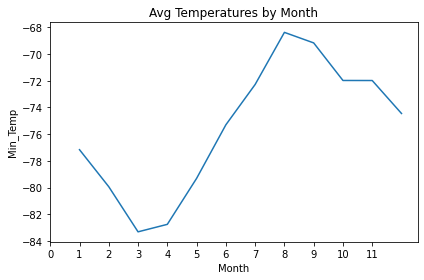

In [122]:
# Plot the average temperature by month
### BASIC PLOT:
#### plt.plot(min_temps_df)
####### plt.xlabel('Month')
####### plt.ylabel('min_temp')

# Set x-axis and tick locations.
x_axis = np.arange(len(min_temps_df))
tick_locations = [value for value in x_axis]

# Plot the data.
plt.title("Avg Temperatures by Month")
plt.plot(min_temps_df)
plt.xticks(tick_locations, x_axis)
plt.xlabel('Month')
plt.ylabel('Min_Temp')
# plt.figure(figsize=(250, 200))
plt.tight_layout()
plt.show()

# Find monthly min/max temps

In [56]:
min_data_df = mars_temp_df.groupby('month').min()

min_temps_df = min_data_df.sort_index(ascending=True)
min_temps_df

,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,319,2013-08-01,351,0,-82.0,820.0
2,371,2013-10-03,412,30,-86.0,867.0
3,421,2013-12-09,477,60,-90.0,833.0
4,487,2014-02-16,544,90,-89.0,754.0
5,552,2014-04-23,609,120,-85.0,727.0
6,2,2012-08-16,10,150,-84.0,732.0
7,3,2012-09-30,54,180,-78.0,751.0
8,7,2012-11-20,104,210,-75.0,828.0
9,59,2013-01-08,151,240,-78.0,896.0


In [57]:
max_data_df = mars_temp_df.groupby('month').max()

max_temps_df = max_data_df.sort_index(ascending=True)
max_temps_df

,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,1668,2017-07-07,1748,29,-62.0,888.0
2,1732,2017-09-12,1814,59,-76.0,908.0
3,1798,2017-11-19,1880,89,-77.0,907.0
4,1863,2018-01-25,1945,119,-77.0,857.0
5,1895,2018-02-27,1977,149,-74.0,777.0
6,1317,2016-07-02,1388,179,-71.0,764.0
7,1360,2016-08-24,1440,209,-65.0,836.0
8,1407,2016-10-11,1487,239,-63.0,914.0
9,1453,2016-11-28,1533,269,-63.0,925.0


# Identify the coldest and hottest months in Curiosity's location

In [66]:
coldest_month_temp = min_temps_df['min_temp'].min()
coldest_month = min_temps_df.loc[min_temps_df['min_temp'] == coldest_month_temp]
coldest_month

,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
3,421,2013-12-09,477,60,-90.0,833.0


In [67]:
hottest_month_temp = max_data_df['min_temp'].max()
hottest_month = max_data_df.loc[max_data_df['min_temp'] == hottest_month_temp]
hottest_month

,id,terrestrial_date,sol,ls,min_temp,pressure
month,,,,,,
1,1668,2017-07-07,1748,29,-62.0,888.0


In [98]:
# 4. Average pressure by Martian month
min_pressure_df = pd.DataFrame(avg_data_df.loc[:,'pressure'])
min_pressure_df

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


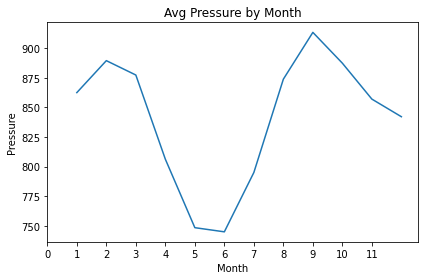

In [121]:
# Plot the average pressure by month
### BASIC PLOT:
#### plt.plot(min_pressure_df)
####### plt.xlabel('Month')
####### plt.ylabel('Pressure')

# Set x-axis and tick locations.
x_axis = np.arange(len(min_pressure_df))
tick_locations = [value for value in x_axis]

# Plot the data.
plt.title("Avg Pressure by Month")
plt.plot(min_pressure_df)
plt.xticks(tick_locations, x_axis)
plt.xlabel('Month')
plt.ylabel('Pressure')
# plt.figure(figsize=(250, 200))
plt.tight_layout()
plt.show()

In [117]:
# 5. How many terrestrial (earth) days are there in a Martian year?
terrestrial_days = len(pd.unique(mars_temp_df['terrestrial_date']))
terrestrial_days

1867

On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [ ]:
# Write the data to a CSV


In [ ]:
# browser.quit()